This notebook contains the solution codes for the comprehension-type questions for the module '**Working with OpenAI APIs and Prompt Engineering**'.

<br>

**INSTRUCTIONS:**
- Ignore codes/cells highlighted in <font color='RED'>RED TEXT</font>. These are the essential for running the subsequent cells.
- You can modify the cells separated by <font color='green'>GREEN TEXT</font>


# <font color='RED' >IMPORT THE LIBRARIES</font>
---





In [ ]:
# @title DO NOT MODIFY - Run this cell to install OpenAI library and import OpenAI API Key (NOTE: Make sure that the text file is uploaded correctly)
######## DO NOT MODIFY ########
# Install the OpenAI Library
!pip install -U -q openai
# import openai and set the API key
import openai
import os

with open("/content/OPENAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

# <font color='RED' >MCQ 1
**NOTE:** Do not modify</font>
<br>

Based on the dataset, classify the laptop into one of the following tags corresponding to their categories:
- general
- business
- gamer
- programmer
- multimedia

In [ ]:
# @title DO NOT MODIFY - Import the necessary libraries & dataset for MCQ 1 and display the DataFrame
######## DO NOT MODIFY ########
# import the necessary libraries
import pandas as pd
import numpy as np
df = pd.read_csv('https://cdn.upgrad.com/uploads/production/5a1512d8-a326-4b21-8a1c-40b0a2e0082e/laptop_descriptions.csv')
df.head()

,laptop_description
0,The Dell Inspiron is a versatile laptop that c...
1,The MSI GL65 is a high-performance laptop desi...
2,The HP EliteBook is a premium laptop designed ...
3,The Lenovo IdeaPad is a versatile laptop that ...
4,The ASUS ZenBook Pro is a high-end laptop that...


| Category | Description |
| --------------- | --------------- |
| general | For general purpose use such as light web browsing, editing documents etc. |
| business | For business users, the focus is on portability, battery backup and general purpose use. |
| gamer | For gamers, the focus is primarily on high-performance, a separate GPU for high-performance graphics, a high-end CPU processor etc. |
| programmer | For programmers, the focus is on performance, battery backup, high-end RAM etc. |
| multimedia | For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc. |


The final output dataframe should like the table below:

| Blaptop_description | category |
|--------------- |--------------- |
| The Dell Inspiron ... | **general** |
| The MSI GL65 ... | **gaming** |
|  ... | **...** |


# <font color='green' >CODE FOR MCQ 1</font>
 ---


In [ ]:
# @title TO DO 1.1 - OpenAI Chat Completion Response

### Function to get OpenAI's response - ChatCompletion Model
def get_chat_response_mcq1(user_request):

  '''
  This function ONLY takes `user_request` as the input argument.
  As you can see, the System Prompt is given inside the function itself so we don't require to give it as an input argument
  '''
  MODEL = 'gpt-3.5-turbo-1106'# Define GPT model

  SYSTEM_MESSAGE = '''You are a shopping assistant. The user will give you laptop description and some categories and their details. You have to find out which of the categories does the laptop fit best according to description. Remember to only give one word output, the category name, from the list of categories only, which resembles most closely.''' # Default System Message

  try:

    messages = [
        {"role": 'system', "content": SYSTEM_MESSAGE},
        {"role": 'user', "content": user_request}
    ] # Define the list of messages

    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )
        # Get the ChatCompletion Response from the GPT-3.5 model

    # Parse the response_content from the message
    response_content = response.choices[0].message.content

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [ ]:
# @title TO DO 1.2 - PROMPT DEFINITION


mcq1_prompt = '''
From the description of a laptop (delimited by '###'), you have to identify what role does the laptop serve. Refer to the key value pairs of categories and category details below. Identify which of the following details does the product description fits best and assign that category to that latpop. \n
Categories:
[
    'general': 'For general purpose use such as light web browsing, editing documents etc.'
    'business': 'For business users, the focus is on portability, battery backup and general purpose use.'
    'gamer': 'For gamers, the focus is primarily on high-performance, high-end graphics requirement, efficient processor etc.'
    'programmer': 'For programmers, the focus is on performance, battery backup, high-end RAM etc.'
    'multimedia': 'For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc.' # Write the prompt here
] \n
Laptop description: {description}
'''

# We have used string formatting to give description inputs along with the prompt.

In [ ]:
# @title TO DO 1.3 - Code to tag the laptop based on their descriptions

def tag_laptop():

  laptop_df = df.copy()
  laptop_dict = laptop_df.to_dict(orient ='records')

  # Get the laptop_category for each laptop_decription df['Description'] by iterating over the dataframe with a for-loop

  for i in range(len(laptop_dict)):
    prompt = mcq1_prompt.format(description=laptop_dict[i]['Description'])
    laptop_category = get_chat_response_mcq1(prompt)
    # Assign the laptop category to the column laptop_category
    laptop_df.at[i,'Category'] = laptop_category

  # return the DataFrame
  return laptop_df

In [ ]:
# Calling the function
tag_df = tag_laptop()

In [ ]:
# Finding the category of a laptop at an index
tag_df.iloc[1]['Category']

'gamer'

In [ ]:
# Total number of products of each category
tag_df['Category'].value_counts()

# <font color='RED' >MCQ 2
**NOTE:** Do not modify</font>
<br>
**Task**: Information Extraction

Extract the relevant values for the following dictionary items from the product description.


```
{
    "Brand": ___ ,
    "Model Name": ___ ,
    "GPU processor": ___ ,
    "Display Resolution": ___ ,
    "Weight": ___ ,
    "Processor": ___ ,
    "Clock speed": ___ ,
    "Budget": ___
```

You can add this property dictionary for all the products to a list and output that list.

# <font color='GREEN' >CODE FOR MCQ 2</font>
 ---

In [ ]:
# @title TO DO 2.1 - CREATE THE PROMPT
structure = '''{
    "Brand": ___ ,
    "Model Name": ___ ,
    "GPU processor": ___ ,
    "Display Resolution": ___ ,
    "Weight": ___ ,
    "Processor": ___ ,
    "Clock speed": ___ ,
    "Budget": ___
}'''

# Write the prompt here
mcq2_prompt = '''
Laptop Decription: {description}
From the laptop decription above, you have to extract relevant values for the following dictionary items. The dictionary structure should be as follows: {str}
Try giving quantitative, absolute, or numerical outputs. Try not to give qualitative or adjective outputs. for example: If the processing speed of a laptop is 2.4GHz, then, in the "processing speed" key, give output as '2.4GHz' instead of 'very fast'.
Extract only one word values of these properties. Fill in the blanks for each product and output each product's dictionary in json format.
'''


# We are giving the product descriptions as well as the dictionary structure of our required output

In [ ]:
# @title TO DO 2.2 - Define the OpenAI Chat Completion Response
# Function to get OpenAI's response - ChatCompletion Model
def get_chat_response_mcq2(user_request):

  MODEL = 'gpt-3.5-turbo-1106'# Define GPT model

  SYSTEM_MESSAGE = 'You are a helpful shopping assitant.'# Default System Message

  try:
  # Define the list of messages
    messages = [
        {'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}
    ]

# Get the ChatCompletion Response from the GPT-3.5 model
    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages,
        response_format = {'type': 'json_object'}
    )

    response_content = response.choices[0].message.content
    # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [ ]:
# @title 2.3 TO DO - Write the code to extract product information from the 'Description' value in the DataFrame
def extract_information():

  laptop_df = df.copy()
  laptop_dict = laptop_df.to_dict(orient ='records')

  # Creating an empty list to store the properties
  result = []

  # Get the relevant values for each of the property:
  for i in range(len(laptop_dict)):
    prompt = mcq2_prompt.format(description=laptop_dict[i]['Description'], str=structure)
    values = get_chat_response_mcq2(prompt)
    result.append(values)
    # We will print each of the dictionary of properties
    print(result[i])
  # But in the function output, we are returning the whole list as a whole.
  return result
  # Your solution can differ, but your end goal is to output the properties for all products in one single list.

In [ ]:
# Calling the function
values = extract_information()

{
    "Brand": "Dell",
    "Model Name": "Inspiron",
    "GPU processor": "Intel",
    "Display Resolution": "1920x1080",
    "Weight": "2.5kg",
    "Processor": "Intel Core i5",
    "Processing speed": "2.4GHz",
    "Budget": 35000
}
{
    "Brand": "MSI",
    "Model Name": "GL65",
    "GPU processor": "NVIDIA GTX",
    "Display Resolution": "1920x1080",
    "Weight": "2.3kg",
    "Processor": "Intel Core i7",
    "Processing speed": "2.6GHz",
    "Budget": "55,000"
}
{
    "Brand": "HP",
    "Model Name": "EliteBook",
    "GPU processor": "Intel UHD",
    "Display Resolution": "1920x1080",
    "Weight": "1.5kg",
    "Processor": "Intel Core i7",
    "Processing speed": "2.8GHz",
    "Budget": "90,000"
}
{
    "Brand": "Lenovo",
    "Model Name": "IdeaPad",
    "GPU processor": "UHD",
    "Display Resolution": "1366x768",
    "Weight": "2.2kg",
    "Processor": "Intel Core i3",
    "Processing speed": "2.1GHz",
    "Budget": "25,000"
}
{
    "Brand": "ASUS",
    "Model Name": "ZenBook 

In [ ]:
# @title TO DO 2.4 - Find the best laptops for particular tasks

# We have to convert the list to a string for convenience in the next part
string = ''
for i in range(len(values)):
  string = string + values[i] + "\n"

# Giving the property values as input to system

SYSTEM_PROMPT = '''{props} \n This is a list of laptops and their properties. Strictly adhere to the given list only and output the product name only if found in the list.
\n The user will ask for the best suited laptop for a task, your job is to find out a laptop which is the best fit for the task. Use these to undestand which laptops can work with the required task:
Categories:
[
    'general': 'For general purpose use such as light web browsing, editing documents etc.'
    'business': 'For business users, the focus is on portability, battery backup and general purpose use.'
    'gamer': 'For gamers, the focus is primarily on high-performance, high-end graphics requirement, efficient processor etc.'
    'programmer': 'For programmers, the focus is on performance, battery backup, high-end RAM etc.'
    'multimedia': 'For multimedia use cases, the requirements are a good quality/ high resolution display, wide screens, good audio and video quality, battery backup, efficiency etc.' # Write the prompt here
] \n
 If you do not find any relevant information in the laptop list, please answer "not found".
'''.format(props = 'string')

user_request = 'From the list of laptops in your system prompt, which is the best laptop for watching movies?'

def get_chat_response(sys_msg, user_request):

  MODEL = 'gpt-3.5-turbo-1106'# Define GPT model


  try:
  # Define the list of messages
    messages = [
        {'role': 'system', 'content': sys_msg},
        {'role': 'user', 'content': user_request}
    ]

# Get the ChatCompletion Response from the GPT-3.5 model
    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )

    response_content = response.choices[0].message.content
    # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [ ]:
print(get_chat_response(SYSTEM_PROMPT, user_request))

The best laptop for watching movies from the list would be:

1. Dell XPS 15 - Multimedia

This laptop is well-suited for multimedia use cases, with its high-resolution display, good audio and video quality, and efficient performance.


# <font color='RED' >MCQ 3
**NOTE:** Do not modify</font>
<br>

Build a Question & Answering (Q&A) system by using wikipedia for extracting the relevant context and relaying the information to the user.

The sequencd of steps is detailed below with the expected output from each function being called:

1. The user inputs the query "How tall is the Eiffel Tower?"

2. The first LLM function will identify the subject of the user's query and extract the relevant search term for querying through Wikipedia. In this case, the subject of the user's query is 'Eiffel Tower'.

3. The  function `wiki_search` (that has already been defined) will search wikipedia for the provided `query_term` and return the wikipedia article.
In this case the function will search wikipedia for the term 'Eiffel Tower' and return the wikipedia content on `Eiffel Tower`

4. The third function will pass the wikipedia content along with the user's original query to return the answer to the query.

In this case, the third function `user_answer` uses the Wikipedia content and the original user query to return the following output: Eiffel Tower is 300 meters tall.

**NOTE**: Make sure to give only the Wikipedia content as context to the model in the third function `user_answer`.
(Hint - You can give the content to user by attaching it to the user_request input to the function)

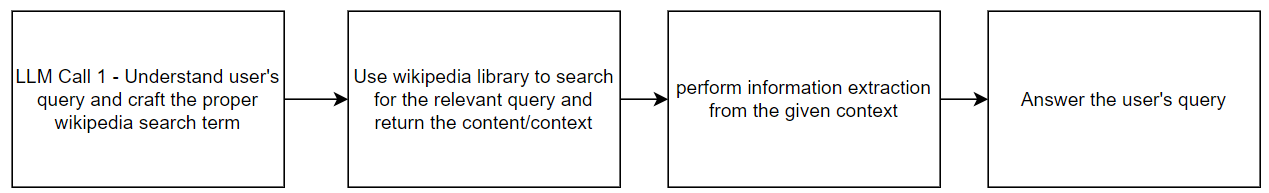

In [ ]:
# @title DO NOT MODIFY - Install the Wikipedia Library
######## DO NOT MODIFY ########
# Install wikipedia library
!pip install -q -U wikipedia-api
import wikipediaapi

In [ ]:
######## DO NOT MODIFY ########
# @title DO NOT MODIFY - Wikipedia Search Function
# Function to search Wikipedia for the user's search query and then return the content
# Import necessary library or module
import wikipediaapi

# Define a function named wiki_search that takes a query term as input
def wiki_search(query_term):
    """
    Search Wikipedia for the user's search query and return the content.

    Args:
    - query_term (str): The search term or query to look up on Wikipedia.

    Returns:
    - str: The content retrieved from the Wikipedia page corresponding to the query term.
    """

    # Set the Wikipedia user-agent header
    string = "SearchQuery/1.0 (upGrad;)"

    # Create a Wikipedia API object with the specified user agent and language
    wiki_wiki = wikipediaapi.Wikipedia(user_agent=string, language='en')

    # Use the Wikipedia API to get the page corresponding to the query term
    page = wiki_wiki.page(query_term)

    # Extract the text content of the Wikipedia page
    content = page.text

    # Return the retrieved content from the Wikipedia page
    return content


# <font color='GREEN' >CODE FOR MCQ 3</font>
 ---

In [ ]:
user_request = '''
Current president of India?
'''

In [ ]:
# Function to get OpenAI's response - ChatCompletion Model
# Extract the relevant search query from the user's input
def get_wiki_query(user_request):

  MODEL = 'gpt-3.5-turbo'# Define GPT model

# Default System Message
  SYSTEM_MESSAGE = '''
  The user will ask you a question. Your task is to extract a general topic name about which the user wants to know.
  You have to give output of just the main topic of the questions.
  For example, if the user asks for "height of Narendra Modi", you have to give the answer as 'Narendra Modi'.
  If the user asks for "When was Eiffel tower built?", you have to give output as 'Eiffel Tower'.
  Similarly, whatever the user asks, you have to extract the main point of the question as a context and give out that as answer, do not add the other atributes about the topic asked in the question.
  If this doesn't work, extract the closest matching search query that will be able to give the required information from wikipedia. for example, if the user asks "Where is the next FIFA world cup", give the output as 'FIFA World Cup'.
  '''

  try:

    messages = [
        {'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}
    ] # Define the list of messages

    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )# Get the ChatCompletion Response from the GPT-3.5 model

    response_content = response.choices[0].message.content # Parse the response_content from the message

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [ ]:
# We will call the first and second functions to search in wikipedia about the extracted basic query term
query = get_wiki_query(user_request) # Get search term
context = wiki_search(query) # Use the content received from previous function as context to get Wiki page info

print(query)
print(context)

President of India
The president of India (ISO: Bhārata kē Rāṣṭrapati) is the head of state of the Republic of India. The president is the nominal head of the executive, the first citizen of the country, as well as the supreme commander of the Indian Armed Forces. Droupadi Murmu is the 15th and current president, having taken office from 25 July 2022.
The office of president was created when India became a republic on 26 January 1950 when its constitution came into force. The president is indirectly elected by an electoral college comprising both houses of the Parliament of India and the legislative assemblies of each of India's states and territories, who themselves are all directly elected by the citizens.
Article 53 of the Constitution of India states that the president can exercise their powers directly or by subordinate authority, though all of the executive powers vested in the president are, in practice, exercised by the prime minister heading the Council of Ministers. The presi

In [ ]:
# Function to get OpenAI's response - ChatCompletion Model
# Search for the user's query from Wikipedia content
def search_wiki_information(user_request, content = context):

  MODEL = 'gpt-3.5-turbo-1106' # Define GPT model

  SYSTEM_MESSAGE = '''You're a helpful assistant that responds to the user query
    based on given context. Strictly adhere to the context only, do not answer from other sources. If you do not know any information, just say give the message "Information not found".
    context : {}'''.format(content)

  # We used string formatting to include the Wikipedia content along with the system message. You can also do so with user request


  try:
    messages = [
        {'role': 'system', 'content': SYSTEM_MESSAGE},
        {'role': 'user', 'content': user_request}
    ] # Define the list of messages

    response = openai.chat.completions.create(
        model = MODEL,
        messages = messages
    )# Get the ChatCompletion Response from the GPT-3.5 model

    response_content = response.choices[0].message.content

    return response_content

  # Raise exception error
  except Exception as e:
    print(f"An error occurred: {e}")
    return None

In [ ]:
search_wiki_information(user_request)

'The current president of India is Droupadi Murmu, who took office from 25 July 2022.'

Notice that the final answer of our code, for the current president of India is 'Droupadi Murmu'. This means that the code is working fine and is indeed using Wikipedia to extract information as gpt-3.5 does not have latest information in its training dataset.